<a href="https://colab.research.google.com/github/DerinOgrenme2021/GizemUnal/blob/main/Keras-tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split

# Mnist eğitim verilerini içe aktarıyoruz
# Mnist veri seti zaten keras arşivinde olduğu için oradan verileri oradan alıyoruz
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [ ]:
# x = np.concatenate((x_train, x_test))
# y = np.concatenate((y_train, y_test))

# train_size = 0.7
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_seed=2019)

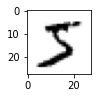

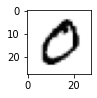

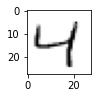

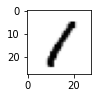

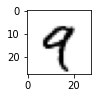

In [14]:
for i in range(5):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i].reshape((28,28)),cmap=pyplot.get_cmap('Greys'))
  pyplot.show()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
                                    ])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#modeli derliyoruz
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:

#Model eğitimini başlatıyoruz
model.fit(x_train, y_train, batch_size=9,epochs=10)

Epoch 1/10
6667/6667 [==============================] - 11s 2ms/step - loss: 0.2488 - accuracy: 0.9259
Epoch 2/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.1301 - accuracy: 0.9606
Epoch 3/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.1020 - accuracy: 0.9682
Epoch 4/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0882 - accuracy: 0.9730
Epoch 5/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0749 - accuracy: 0.9764
Epoch 6/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0683 - accuracy: 0.9785
Epoch 7/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0612 - accuracy: 0.9802
Epoch 8/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0558 - accuracy: 0.9823
Epoch 9/10
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0528 - accuracy: 0.9830
Epoch 10/10
6667/6667 [==============================] - 10s 2ms/step - l

In [19]:
#Eğitimi tamamlanmış modelimizin yaptığı tahminlerin doğruluk değerleri

eval_model_train = model.evaluate(x_train, y_train)



1875/1875 [==============================] - 2s 1ms/step - loss: 0.0170 - accuracy: 0.9945


In [20]:
eval_model_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0800 - accuracy: 0.9774
